In [81]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "Pyber_data_city_data.csv"
ride_data = "Pyber_data_ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

city_data_df = pd.read_csv(city_data)

ride_data_df = pd.read_csv(ride_data)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [82]:
combined_data_df = pd.merge(city_data_df, ride_data_df, how= 'outer', on='city')

# Display the data table for preview

combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


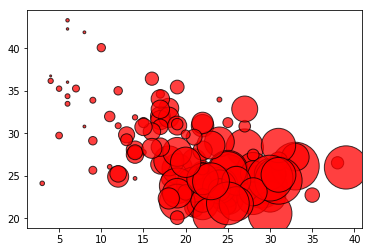

In [83]:
driver_count = combined_data_df["driver_count"]

price = combined_data_df['fare']

# Average Fare ($) Per City
ave_farepercity = combined_data_df.groupby('city').mean()
y = ave_farepercity['fare']

# Total Number of Rides Per City
total_ridespercity = combined_data_df.groupby('city').count()
x = total_ridespercity['ride_id']

# Total Number of Drivers Per City
total_driverspercity = combined_data_df.groupby('city').sum()
s = total_driverspercity['driver_count']

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black",
            s=s, alpha=0.75)


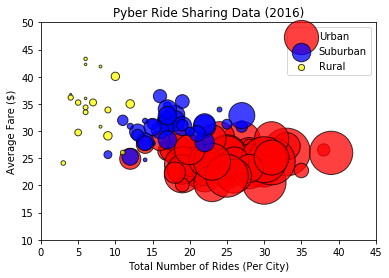

In [87]:
# City Type (Urban, Suburban, Rural)
urban_df = combined_data_df[combined_data_df['type'] == 'Urban']
urban_df.head()


y_urban = urban_df.groupby('city').mean()['fare']
s_urban = urban_df.groupby('city').sum()['driver_count']
x_urban = urban_df.groupby('city').count()['ride_id']

suburban_df = combined_data_df[combined_data_df['type'] == 'Suburban']
suburban_df.head()

y_suburban = suburban_df.groupby('city').mean()['fare']
s_suburban = suburban_df.groupby('city').sum()['driver_count']
x_suburban = suburban_df.groupby('city').count()['ride_id']


rural_df = combined_data_df[combined_data_df['type'] == 'Rural']
rural_df.head()

y_rural = rural_df.groupby('city').mean()['fare']
s_rural = rural_df.groupby('city').sum()['driver_count']
x_rural = rural_df.groupby('city').count()['ride_id']


plt.scatter(x_urban, y_urban, marker="o", c="red", edgecolors="black",
            s=s_urban, alpha=0.75, label = 'Urban')
plt.scatter(x_suburban, y_suburban, marker="o", c="blue", edgecolors="black",
            s=s_suburban, alpha=0.75, label = 'Suburban')
plt.scatter(x_rural, y_rural, marker="o", c="yellow", edgecolors="black",
            s=s_rural, alpha=0.75, label = 'Rural')


plt.title("Pyber Ride Sharing Data (2016)")

plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel("Average Fare ($)")

 
plt.xlim(0,45)

plt.ylim(10, 50)

plt.legend(loc="best")



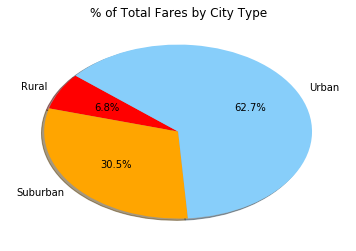

In [101]:
#  % of Total Fares by City Type

total_fares = combined_data_df.groupby('type').sum()['fare']

plt.title("% of Total Fares by City Type")

labels = ("Rural","Suburban", "Urban" )

sizes = [total_fares[0], total_fares[1], total_fares[2]]

colors = ["red", "orange", "lightskyblue"]
          
plt.pie(sizes, labels=labels, colors=colors,

        autopct="%1.1f%%", shadow=True, startangle=140)  
    
plt.savefig("piechart_totalfaresbycity.png")

In [ ]:
 # Show Figure
plt.show()

([<matplotlib.patches.Wedge at 0x11f58a630>,
 [Text(-0.947536,0.558727,'Rural'),
  Text(-0.986001,-0.48765,'Suburban'),
  Text(1.05282,0.318709,'Urban')],
 [Text(-0.516838,0.30476,'5.3%'),
  Text(-0.537819,-0.265991,'26.3%'),
  Text(0.574264,0.173841,'68.4%')])

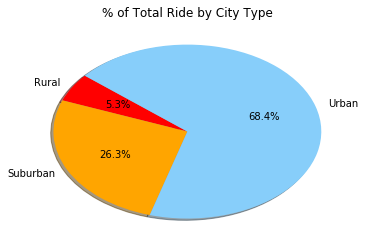

In [104]:
 # Calculate Ride Percents
 
total_ride = combined_data_df.groupby('type').count()['ride_id']

plt.title("% of Total Ride by City Type")

labels = ("Rural","Suburban", "Urban" )

sizes = [total_ride[0], total_ride[1], total_ride[2]]

colors = ["red", "orange", "lightskyblue"]
          
plt.pie(sizes, labels=labels, colors=colors,

        autopct="%1.1f%%", shadow=True, startangle=140)  
    
plt.savefig("piechart_totalridebycitytype.png")

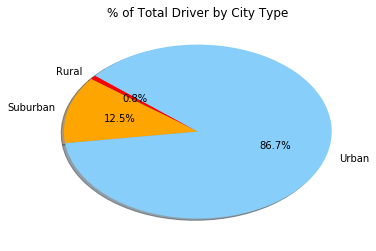

In [109]:
 # Calculate Driver Percents
    
total_driver = combined_data_df.groupby('type').sum()['driver_count']

plt.title("% of Total Driver by City Type")

labels = ("Rural","Suburban", "Urban" )

sizes = [total_driver[0], total_driver[1], total_driver[2]]

colors = ["red", "orange", "lightskyblue"]
          
plt.pie(sizes, labels=labels, colors=colors,

        autopct="%1.1f%%", shadow=True, startangle=140)  
    
plt.savefig("piechart_totaldriverbycitytype.png")